In [1]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger
from tuxai.report import model_metrics, Report

config_logger()

# MAPE for each version and target

In [ ]:
from tuxai.misc import cache
c = cache()
key = "xgboost_model_2022_12_13"
if key in c:
    df = c[key]
else:
    report = Report()
    df = report.xgboost_model()
    c[key] = df
df

2022-12-08 10:55:08,171 :: INFO :: tuxai.report :: generating xgboost report


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [22]:
cols = ["version", "collinearity", "target", "mean absolute percentage error"]
#df_413 = df[df.version == "4.13"][cols]#.set_index(cols[:2])
df_413 = df[df.version == "4.13"][cols]
df_413

,version,collinearity,target,mean absolute percentage error
0,4.13,False,vmlinux,0.070124
1,4.13,True,vmlinux,0.070235
2,4.13,False,GZIP-vmlinux,0.043388
3,4.13,True,GZIP-vmlinux,0.043638
4,4.13,False,BZIP2-vmlinux,0.031313
5,4.13,True,BZIP2-vmlinux,0.037973
6,4.13,False,LZMA-vmlinux,0.039646
7,4.13,True,LZMA-vmlinux,0.039931
8,4.13,False,XZ-vmlinux,0.039539
9,4.13,True,XZ-vmlinux,0.040167


[Text(0.5, 1.0, 'MAPE for each version and target')]

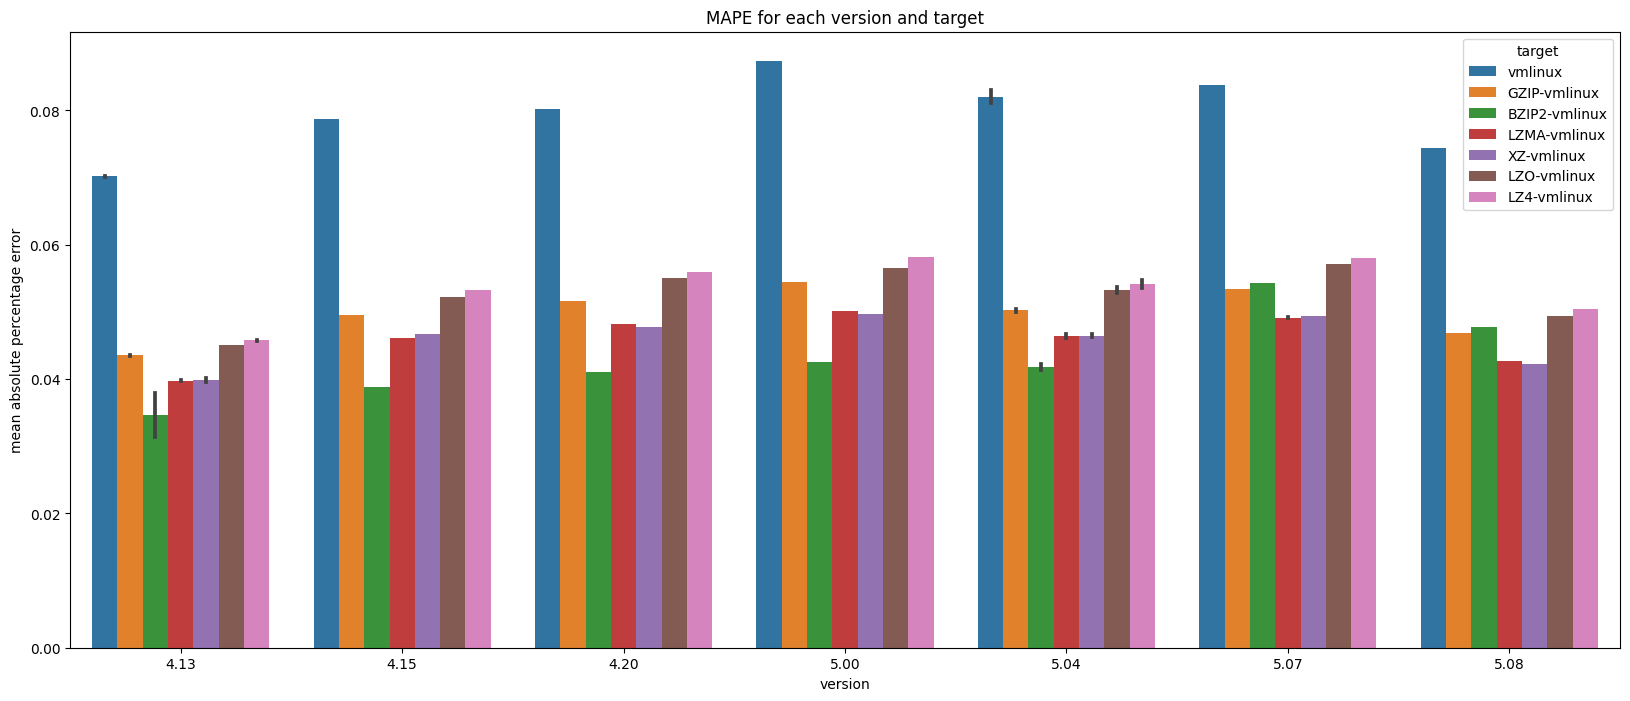

In [29]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df, x="version", y="mean absolute percentage error", hue="target").set(title='MAPE for each version and target')

# Feature importance comparison and stability

In [8]:
from tuxai.misc import cache
c = cache()
key = "feature_importance_2022_12_13"
if key in c:
    df = c[key]
else:
    report = Report()
    df = report.feature_importance()
    c[key] = df
df

,version,collinearity,target,option,importance,groups
0,4.13,False,vmlinux,"{0: 'RANDOMIZE_BASE', 1: 'DEBUG_INFO', 2: 'UBS...","{0: 447.0, 1: 444.0, 2: 346.0, 3: 299.0, 4: 19...","{0: 'RANDOMIZE_BASE', 1: 'DEBUG_INFO', 2: 'UBS..."
1,4.13,True,vmlinux,"{0: 'RANDOMIZE_BASE', 1: 'DEBUG_INFO', 2: 'UBS...","{0: 447.0, 1: 444.0, 2: 346.0, 3: 299.0, 4: 19...","{0: 'RANDOMIZE_BASE', 1: 'DEBUG_INFO', 2: 'UBS..."
2,4.13,False,GZIP-vmlinux,"{0: 'KASAN', 1: 'GCOV_PROFILE_ALL', 2: 'UBSAN_...","{0: 316.0, 1: 297.0, 2: 292.0, 3: 155.0, 4: 13...","{0: 'KASAN', 1: 'GCOV_PROFILE_ALL', 2: 'UBSAN_..."
3,4.13,True,GZIP-vmlinux,"{0: 'CORR|0038', 1: 'GCOV_PROFILE_ALL', 2: 'UB...","{0: 316.0, 1: 297.0, 2: 292.0, 3: 155.0, 4: 13...","{0: 'KASAN_OUTLINE, KASAN', 1: 'GCOV_PROFILE_A..."
4,4.13,False,BZIP2-vmlinux,"{0: 'UBSAN_SANITIZE_ALL', 1: 'KASAN', 2: 'GCOV...","{0: 323.0, 1: 313.0, 2: 280.0, 3: 172.0, 4: 15...","{0: 'UBSAN_SANITIZE_ALL', 1: 'KASAN', 2: 'GCOV..."
...,...,...,...,...,...,...
93,5.08,True,XZ-vmlinux,"{0: 'GCOV_PROFILE_ALL', 1: 'UBSAN_SANITIZE_ALL...","{0: 209.0, 1: 193.0, 2: 143.0, 3: 135.0, 4: 90...","{0: 'GCOV_PROFILE_ALL', 1: 'UBSAN_SANITIZE_ALL..."
94,5.08,False,LZO-vmlinux,"{0: 'UBSAN_SANITIZE_ALL', 1: 'GCOV_PROFILE_ALL...","{0: 228.0, 1: 218.0, 2: 172.0, 3: 159.0, 4: 14...","{0: 'UBSAN_SANITIZE_ALL', 1: 'GCOV_PROFILE_ALL..."
95,5.08,True,LZO-vmlinux,"{0: 'UBSAN_SANITIZE_ALL', 1: 'GCOV_PROFILE_ALL...","{0: 228.0, 1: 218.0, 2: 172.0, 3: 159.0, 4: 14...","{0: 'UBSAN_SANITIZE_ALL', 1: 'GCOV_PROFILE_ALL..."
96,5.08,False,LZ4-vmlinux,"{0: 'UBSAN_SANITIZE_ALL', 1: 'GCOV_PROFILE_ALL...","{0: 211.0, 1: 205.0, 2: 179.0, 3: 159.0, 4: 11...","{0: 'UBSAN_SANITIZE_ALL', 1: 'GCOV_PROFILE_ALL..."
